### Part 1: NYT API Intro

In [1]:
import requests

In [3]:
myAPIKey = "HljJLGu5hgLAgMCIo4GsezFkska5Lpxb"

In [4]:
year = 2024
month = 2
URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={myAPIKey}"
print(URL)

https://api.nytimes.com/svc/archive/v1/2024/2.json?api-key=HljJLGu5hgLAgMCIo4GsezFkska5Lpxb


In [5]:
data = requests.get(URL)
data.status_code

200

In [6]:
articles = data.json()
len(articles)

2

In [7]:
articles.keys()

dict_keys(['copyright', 'response'])

In [8]:
articles['response']['docs'][0]

{'abstract': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'web_url': 'https://www.nytimes.com/2024/01/31/opinion/racist-backlash-history.html',
 'snippet': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'lead_paragraph': 'I am fascinated, and alarmed, by the swiftness with which periods of backlash take shape after surges of Black progress, and I believe that we have entered another such period.',
 'print_section': 'A',
 'print_page': '21',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
   'height': 800,
   'width': 600,
   'subType': 'xlarge',
   'crop_name': 'articleLarge',
   'legacy': {'xlarge': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
    'xlargewidth': 6

In [20]:
from collections import Counter
section_names = []
for article in articles['response']['docs']:
    section_names.append(article['section_name'])

c = Counter(section_names)
c.most_common()


[('U.S.', 734),
 ('World', 513),
 ('Arts', 326),
 ('Opinion', 272),
 ('Business Day', 244),
 ('New York', 200),
 ('Style', 174),
 ('Books', 139),
 ('Crosswords & Games', 125),
 ('Movies', 123),
 ('Food', 80),
 ('Podcasts', 79),
 ('The Learning Network', 78),
 ('Briefing', 77),
 ('Real Estate', 62),
 ('Theater', 58),
 ('Health', 58),
 ('Corrections', 56),
 ('T Magazine', 51),
 ('Science', 50),
 ('Climate', 50),
 ('Technology', 49),
 ('Well', 47),
 ('Magazine', 41),
 ('Travel', 31),
 ('Times Insider', 22),
 ('The Upshot', 19),
 ('Your Money', 7),
 ('Sports', 7),
 ('T Brand', 4),
 ('Headway', 4),
 ('Obituaries', 3),
 ('Smarter Living', 3),
 ('Today’s Paper', 2),
 ('Fashion & Style', 2),
 ('International Home', 1)]

### Part 2: Semantic Similarity

In [24]:
sentences = ["she wore a dress and red earrings","the dress has a red wine stain",
             "tomorrow I will wear my new red dress","the red dress in the photo resembles the red dress she is wearing",
             "short dress", "red lipstick"]

In [36]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import seaborn as sn 

In [27]:
def cosineSimilarity(vec1,vec2):
    """
    calculate the cosine simliarity between the two vectors.
    """
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1,V2)/(norm(V1)*norm(V2))
    return cosine

In [ ]:
words = [word for sentence in sentences for word in sentence.split(" ")]
set(words)

In [53]:
df = pd.DataFrame(0,index=range(len(sentences)),columns=[item for item in set(words)])

In [55]:
for i, sentence in enumerate(sentences):
    for word in sentence.split(" "):
        df.loc[i,word] += 1

In [56]:
df

,wearing,wore,and,dress,she,short,in,my,stain,new,...,a,photo,has,wear,wine,red,will,earrings,lipstick,the
0,0,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,1,0,0,0,1
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
3,1,0,0,2,1,0,1,0,0,0,...,0,1,0,0,0,2,0,0,0,3
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [57]:
cosine_similarity_matrix = np.zeros((len(sentences), len(sentences)))
for i, s1 in df.iterrows():
    for j, s2 in df.iterrows():
        cosine_similarity_matrix[i][j] = cosineSimilarity(s1.values,s2.values) 


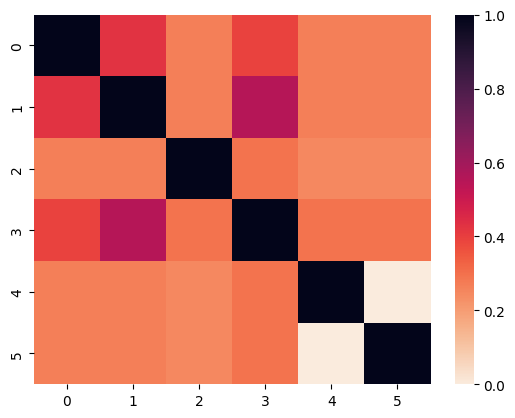

In [60]:
hm = sn.heatmap(data=cosine_similarity_matrix, cmap="rocket_r")